In [54]:
import os
import csv
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from pandas import *

In [55]:
def read_results(train_result_dir):
    legend = []
    data_list = []
    cols = ['      train/box_loss', '      train/obj_loss', '      train/cls_loss', '   metrics/precision', '      metrics/recall', '     metrics/mAP_0.5', 'metrics/mAP_0.5:0.95']
    for dir in os.listdir(train_result_dir):
        if dir[0] == '.': continue
        legend.append(dir[4:])
        file = read_csv(train_result_dir+dir+'/results.csv')
        data = []
        for col in cols:
            data.append(file[col].tolist())
        data_list.append(data)
    return data_list, legend


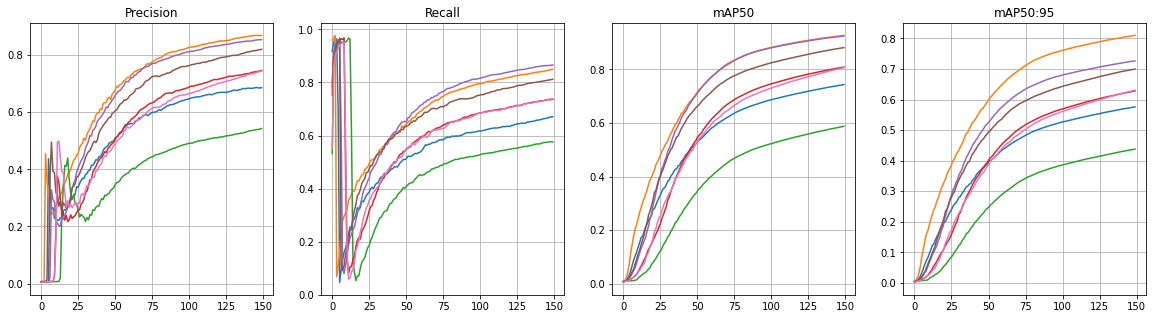

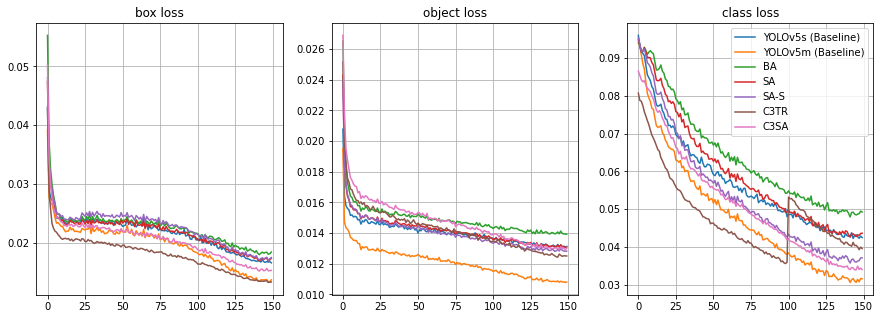

In [57]:
train_result_dir = 'runs/train/'
data, legend = read_results(train_result_dir)

fig1, axs1 = plt.subplots(1,4,figsize=(20,5))
fig2, axs2 = plt.subplots(1,3,figsize=(15,5))
for i in range(len(data)):
    results = data[i]
    for j in reversed(range(len(results))):
        if j < 3:
            axs2[j].plot(results[j])
        else:
            axs1[j-3].plot(results[j])
            
axs1[0].set_title('Precision')
axs1[0].grid()
axs1[1].set_title('Recall')
axs1[1].grid()
axs1[2].set_title('mAP50')
axs1[2].grid()
axs1[3].set_title('mAP50:95')
axs1[3].grid()
axs2[0].set_title('box loss')
axs2[0].grid()
axs2[1].set_title('object loss')
axs2[1].grid()
axs2[2].set_title('class loss')
axs2[2].grid()
plt.legend(legend)
fig1.savefig("metrics.png")
fig2.savefig("loss.png")